In [1]:
#import packages for webscraping and API calls
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm

In [2]:
#to be moved to get ignore
client_id = "oXRz7HWebFp6YdQ0YT3PMQ"
api_key = "Mm2MVQluEx7HWKjAMxJQT_KOSB_nKvEeQmjn19VS9PnsOBDoqtegFU1RoBXG0Lum415Eus2bKYuo-eb6mgMm1xV5nhwh3H5uhg-HJN39VFSMjIkwyRCbpLVv7ws7XXYx"

### ----- Helpers--------

In [3]:
# # write a function to make a call to the API

def yelp_call(url_params, api_key):

    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()['businesses']
    return data

In [4]:
#Function to scrape and return info for 1000 restaurants
def all_results(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    results = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        results.append(yelp_call(url_params, api_key))
        time.sleep(1) #Wait a second
        cur += 50
    return results

In [5]:
#Params
term = 'Restaurants'
location = 'Brooklyn'
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50
             }

In [6]:
#Testing the function
yelp_call(url_params,api_key)

[{'id': 'E8gpCgCVaO2hNEPTrh4n2A',
  'alias': 'the-ryerson-brooklyn',
  'name': 'The Ryerson',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/q_PTfUcArQf7hCFUZzfblQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/the-ryerson-brooklyn?adjust_creative=oXRz7HWebFp6YdQ0YT3PMQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oXRz7HWebFp6YdQ0YT3PMQ',
  'review_count': 28,
  'categories': [{'alias': 'southern', 'title': 'Southern'},
   {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
  'rating': 5.0,
  'coordinates': {'latitude': 40.67478, 'longitude': -73.95018},
  'transactions': [],
  'location': {'address1': '698 Nostrand Ave',
   'address2': '',
   'address3': None,
   'city': 'Brooklyn',
   'zip_code': '11216',
   'country': 'US',
   'state': 'NY',
   'display_address': ['698 Nostrand Ave', 'Brooklyn, NY 11216']},
  'phone': '+13474069703',
  'display_phone': '(347) 406-9703',
  'distance': 2662.1703823387525},
 {'id': '2-z6dRAkKupCyz1L

In [7]:
#Getting info using function created previously
all_restaurants = all_results(url_params, api_key)
print(len(all_restaurants))

15200 total matches found.
20


In [8]:
#function to parse the data and keep only the ones that we need
def parse_api(data):
    parsed_data = []
    final_parsed_restaurants = []
    for i in range(len(data)):
        for j in range(50):
            parsed_data.append(data[i][j])
    
    #create a list with SQL tables columnns names
    for parsed_restaurant in parsed_data:
        if 'price' in parsed_restaurant.keys():
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': parsed_restaurant['price'],'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
        else:
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': "",'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
    return final_parsed_restaurants

In [9]:
#call the function and return a list with only the columns names we need
parsed_restaurants_v2 = parse_api(all_restaurants)

In [10]:
len(parsed_restaurants_v2)

1000

In [11]:
parsed_restaurants_v2

[{'restaurant_id': 'E8gpCgCVaO2hNEPTrh4n2A',
  'restaurant_name': 'The Ryerson',
  'price': '',
  'rating': 5.0,
  'review_count': 28},
 {'restaurant_id': '2-z6dRAkKupCyz1LF251pQ',
  'restaurant_name': 'Jintana Thai Farmhouse',
  'price': '',
  'rating': 4.5,
  'review_count': 59},
 {'restaurant_id': 'GA5msU6NO9rQRctPfDJCBg',
  'restaurant_name': 'Peaches HotHouse',
  'price': '$$',
  'rating': 4.0,
  'review_count': 1117},
 {'restaurant_id': '_iPthQyOqcwanZcVZ28M2Q',
  'restaurant_name': 'Franklin820',
  'price': '$$',
  'rating': 4.0,
  'review_count': 64},
 {'restaurant_id': 'GxMhN2PEttvw7CRGIzB6Gg',
  'restaurant_name': "Baron's",
  'price': '$$',
  'rating': 4.5,
  'review_count': 267},
 {'restaurant_id': 'VDz9n7gwcq51wOAbTBdXxA',
  'restaurant_name': 'The Food Sermon Kitchen',
  'price': '$$',
  'rating': 4.5,
  'review_count': 251},
 {'restaurant_id': 'YwpP-mgXV5N35xhLibLw5g',
  'restaurant_name': "Mo's Original",
  'price': '$$',
  'rating': 4.5,
  'review_count': 52},
 {'resta

In [12]:
#Convert data collected in a dataframe
df = pd.DataFrame.from_dict(parsed_restaurants_v2)

In [13]:
df.head()

,restaurant_id,restaurant_name,price,rating,review_count
0,E8gpCgCVaO2hNEPTrh4n2A,The Ryerson,,5.0,28
1,2-z6dRAkKupCyz1LF251pQ,Jintana Thai Farmhouse,,4.5,59
2,GA5msU6NO9rQRctPfDJCBg,Peaches HotHouse,$$,4.0,1117
3,_iPthQyOqcwanZcVZ28M2Q,Franklin820,$$,4.0,64
4,GxMhN2PEttvw7CRGIzB6Gg,Baron's,$$,4.5,267


In [14]:
len(df)

1000

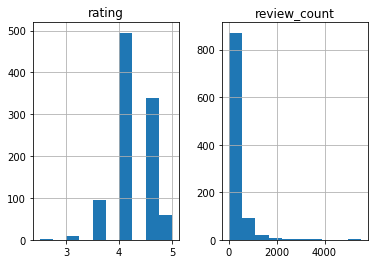

In [15]:
#having a quick look at the data
df.hist()
plt.show()

In [18]:
df.rating.value_counts()

4.0    495
4.5    339
3.5     95
5.0     59
3.0     10
2.5      2
Name: rating, dtype: int64

In [19]:
#exporting data to excel for partner to use
df.to_excel("Restaurant_2.xlsx")

In [20]:
df = pd.read_excel("Restaurant_2.xlsx",index_col=0)

In [19]:
df.head()

,restaurant_id,restaurant_name,price,rating,review_count
0,E8gpCgCVaO2hNEPTrh4n2A,The Ryerson,,5.0,28
1,2-z6dRAkKupCyz1LF251pQ,Jintana Thai Farmhouse,,4.5,59
2,GA5msU6NO9rQRctPfDJCBg,Peaches HotHouse,$$,4.0,1117
3,_iPthQyOqcwanZcVZ28M2Q,Franklin820,$$,4.0,64
4,GxMhN2PEttvw7CRGIzB6Gg,Baron's,$$,4.5,267


In [20]:
restaurant_id_list_2 = list(df.restaurant_id)

In [21]:
restaurant_id_list_2

['E8gpCgCVaO2hNEPTrh4n2A',
 '2-z6dRAkKupCyz1LF251pQ',
 'GA5msU6NO9rQRctPfDJCBg',
 '_iPthQyOqcwanZcVZ28M2Q',
 'GxMhN2PEttvw7CRGIzB6Gg',
 'VDz9n7gwcq51wOAbTBdXxA',
 'YwpP-mgXV5N35xhLibLw5g',
 '49ST--X1jcIPzUIM1O3K6w',
 'el63-4CunMQQBIYpLayFTg',
 'nOjGNqPcu5jHRRElOndQqQ',
 'eN8Cmf0Vxucyg02NyP7mbw',
 'tXWA5kUJnZY_NbED1-ST0g',
 'CwOAKJdX8AMz5iAoA-ZEuA',
 'RfxOtJ4SQmEeVX_XjFLWUQ',
 'swKXaURwqdSrSTcpHsxdbA',
 '1x2hn3e9sCCZca1cnRTpEg',
 'KkAtVVjnMfb1vGlcpzmhgw',
 'hdiTkEnD14VpXNl-APTg2g',
 'unePwYAUWb7oC8RBt84e3A',
 'mxDfu4bHwSXoCr3FRpyMsw',
 'OzgvdC0oJPh1FQTLJF2yXw',
 'NDIrifAl6K-RrnZ2D3ZGbw',
 'XNkC1vJmLOI8NRR3Jl_vyQ',
 '34LM8_lP8iwizHBu6YgaQQ',
 'TRVWU2c4SzbsgWOo6Dz2Aw',
 'SSDOkx5enfRH3nsniS_2jA',
 'BprO0tybje6_T6HdT6icyQ',
 'Ms3CAGddVbgetiQrpzqxPQ',
 'DOdamkEm9JWR9s6VH_NuOQ',
 'eOxGkxi5hEY426ww5qk3GA',
 'wnyX_yg4ddSDkupwFKftIA',
 '4CiYqpxZK2f5-GSkte1ekA',
 'L7_siqDfU4-ZA17YtA-SBg',
 'x_YWFkTcxEu1lo8Nlrog5A',
 'q2bIyvU8CQwiB6xe_iVs0g',
 'oOsJn3leUnWDfErRWMf81g',
 '1Bv7VqxnnfJs8o9NUzGB1g',
 

### Scrape

In [28]:
# using a function to scrape reviews with restaurant ID in a list
#Function will return a list of tuples
def scrape_list(list_id):
    reviews=[]
    for resto_id in tqdm(list_id):
        url_prefix = 'https://www.yelp.com/biz/'
        url_suffix = '?rh_type=phrase'
        test_id = resto_id
        full_url = url_prefix+test_id+url_suffix
        
        source = requests.get(full_url).text
        soup = BeautifulSoup(source,'html')
        all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
        
        for i in range(len(all_reviews_section)):
            reviews.append((test_id,all_reviews_section[i].text))
#             time.sleep(1) #Wait a second
    return reviews           

In [29]:
tuple_reviews = scrape_list(restaurant_id_list_2)




  0%|          | 0/1000 [00:00<?, ?it/s]


  0%|          | 1/1000 [00:04<1:07:49,  4.07s/it]


  0%|          | 2/1000 [00:09<1:14:23,  4.47s/it]


  0%|          | 3/1000 [00:13<1:12:46,  4.38s/it]


  0%|          | 4/1000 [00:18<1:13:08,  4.41s/it]


  0%|          | 5/1000 [00:23<1:16:45,  4.63s/it]


  1%|          | 6/1000 [00:27<1:13:27,  4.43s/it]


  1%|          | 7/1000 [00:30<1:09:32,  4.20s/it]


  1%|          | 8/1000 [00:35<1:11:29,  4.32s/it]


  1%|          | 9/1000 [00:39<1:09:57,  4.24s/it]


  1%|          | 10/1000 [00:44<1:12:46,  4.41s/it]


  1%|          | 11/1000 [00:51<1:26:21,  5.24s/it]


  1%|          | 12/1000 [00:55<1:17:52,  4.73s/it]


  1%|▏         | 13/1000 [01:00<1:19:16,  4.82s/it]


  1%|▏         | 14/1000 [01:04<1:19:03,  4.81s/it]


  2%|▏         | 15/1000 [01:10<1:22:59,  5.06s/it]


  2%|▏         | 16/1000 [01:17<1:32:23,  5.63s/it]


  2%|▏         | 17/1000 [01:24<1:38:59,  6.04s/it]


  2%|▏         | 18/1000 [01:29<1:31:41,  5.6

 13%|█▎        | 129/1000 [10:49<1:10:21,  4.85s/it]


 13%|█▎        | 130/1000 [10:53<1:08:06,  4.70s/it]


 13%|█▎        | 131/1000 [10:57<1:05:10,  4.50s/it]


 13%|█▎        | 132/1000 [11:02<1:07:35,  4.67s/it]


 13%|█▎        | 133/1000 [11:06<1:03:34,  4.40s/it]


 13%|█▎        | 134/1000 [11:12<1:10:40,  4.90s/it]


 14%|█▎        | 135/1000 [11:16<1:07:07,  4.66s/it]


 14%|█▎        | 136/1000 [11:21<1:07:43,  4.70s/it]


 14%|█▎        | 137/1000 [11:25<1:04:23,  4.48s/it]


 14%|█▍        | 138/1000 [11:32<1:15:47,  5.28s/it]


 14%|█▍        | 139/1000 [11:36<1:10:07,  4.89s/it]


 14%|█▍        | 140/1000 [11:40<1:05:08,  4.54s/it]


 14%|█▍        | 141/1000 [11:45<1:08:50,  4.81s/it]


 14%|█▍        | 142/1000 [11:49<1:06:03,  4.62s/it]


 14%|█▍        | 143/1000 [11:55<1:09:36,  4.87s/it]


 14%|█▍        | 144/1000 [11:59<1:08:27,  4.80s/it]


 14%|█▍        | 145/1000 [12:05<1:10:56,  4.98s/it]


 15%|█▍        | 146/1000 [12:10<1:12:21,  5.08s/it]


 15%|█▍   

 26%|██▌       | 257/1000 [21:31<57:55,  4.68s/it]


 26%|██▌       | 258/1000 [21:35<55:33,  4.49s/it]


 26%|██▌       | 259/1000 [21:40<57:59,  4.70s/it]


 26%|██▌       | 260/1000 [21:45<58:42,  4.76s/it]


 26%|██▌       | 261/1000 [21:48<54:20,  4.41s/it]


 26%|██▌       | 262/1000 [21:53<55:05,  4.48s/it]


 26%|██▋       | 263/1000 [21:59<59:23,  4.83s/it]


 26%|██▋       | 264/1000 [22:04<1:01:14,  4.99s/it]


 26%|██▋       | 265/1000 [22:08<56:59,  4.65s/it]  


 27%|██▋       | 266/1000 [22:13<59:59,  4.90s/it]


 27%|██▋       | 267/1000 [22:19<1:03:52,  5.23s/it]


 27%|██▋       | 268/1000 [22:23<59:11,  4.85s/it]  


 27%|██▋       | 269/1000 [22:27<55:46,  4.58s/it]


 27%|██▋       | 270/1000 [22:33<59:10,  4.86s/it]


 27%|██▋       | 271/1000 [22:38<58:35,  4.82s/it]


 27%|██▋       | 272/1000 [22:44<1:02:45,  5.17s/it]


 27%|██▋       | 273/1000 [22:49<1:01:46,  5.10s/it]


 27%|██▋       | 274/1000 [22:56<1:11:54,  5.94s/it]


 28%|██▊       | 275/1000 [23:01

 39%|███▊      | 387/1000 [32:02<51:16,  5.02s/it]


 39%|███▉      | 388/1000 [32:07<50:54,  4.99s/it]


 39%|███▉      | 389/1000 [32:11<48:01,  4.72s/it]


 39%|███▉      | 390/1000 [32:17<49:42,  4.89s/it]


 39%|███▉      | 391/1000 [32:20<43:52,  4.32s/it]


 39%|███▉      | 392/1000 [32:27<52:12,  5.15s/it]


 39%|███▉      | 393/1000 [32:32<51:23,  5.08s/it]


 39%|███▉      | 394/1000 [32:45<1:17:15,  7.65s/it]


 40%|███▉      | 395/1000 [32:50<1:08:29,  6.79s/it]


 40%|███▉      | 396/1000 [32:54<58:39,  5.83s/it]  


 40%|███▉      | 397/1000 [32:57<51:37,  5.14s/it]


 40%|███▉      | 398/1000 [33:01<48:33,  4.84s/it]


 40%|███▉      | 399/1000 [33:06<49:05,  4.90s/it]


 40%|████      | 400/1000 [33:11<48:42,  4.87s/it]


 40%|████      | 401/1000 [33:15<45:59,  4.61s/it]


 40%|████      | 402/1000 [33:20<47:52,  4.80s/it]


 40%|████      | 403/1000 [33:25<48:01,  4.83s/it]


 40%|████      | 404/1000 [33:31<50:23,  5.07s/it]


 40%|████      | 405/1000 [33:35<47:10, 

 52%|█████▏    | 519/1000 [42:49<37:31,  4.68s/it]


 52%|█████▏    | 520/1000 [42:53<35:29,  4.44s/it]


 52%|█████▏    | 521/1000 [42:59<39:02,  4.89s/it]


 52%|█████▏    | 522/1000 [43:06<42:51,  5.38s/it]


 52%|█████▏    | 523/1000 [43:10<39:29,  4.97s/it]


 52%|█████▏    | 524/1000 [43:16<42:17,  5.33s/it]


 52%|█████▎    | 525/1000 [43:21<41:14,  5.21s/it]


 53%|█████▎    | 526/1000 [43:26<41:23,  5.24s/it]


 53%|█████▎    | 527/1000 [43:31<39:57,  5.07s/it]


 53%|█████▎    | 528/1000 [43:36<40:57,  5.21s/it]


 53%|█████▎    | 529/1000 [43:41<38:59,  4.97s/it]


 53%|█████▎    | 530/1000 [43:47<40:43,  5.20s/it]


 53%|█████▎    | 531/1000 [43:51<39:11,  5.01s/it]


 53%|█████▎    | 532/1000 [43:56<39:42,  5.09s/it]


 53%|█████▎    | 533/1000 [44:01<37:54,  4.87s/it]


 53%|█████▎    | 534/1000 [44:05<35:46,  4.61s/it]


 54%|█████▎    | 535/1000 [44:11<38:52,  5.02s/it]


 54%|█████▎    | 536/1000 [44:15<37:23,  4.84s/it]


 54%|█████▎    | 537/1000 [44:19<34:17,  4.44s

 65%|██████▌   | 651/1000 [53:30<27:45,  4.77s/it]


 65%|██████▌   | 652/1000 [53:34<25:50,  4.46s/it]


 65%|██████▌   | 653/1000 [53:38<25:15,  4.37s/it]


 65%|██████▌   | 654/1000 [53:41<23:47,  4.12s/it]


 66%|██████▌   | 655/1000 [53:46<24:47,  4.31s/it]


 66%|██████▌   | 656/1000 [53:52<27:38,  4.82s/it]


 66%|██████▌   | 657/1000 [53:56<25:58,  4.54s/it]


 66%|██████▌   | 658/1000 [54:02<27:32,  4.83s/it]


 66%|██████▌   | 659/1000 [54:07<28:28,  5.01s/it]


 66%|██████▌   | 660/1000 [54:11<26:54,  4.75s/it]


 66%|██████▌   | 661/1000 [54:21<35:03,  6.21s/it]


 66%|██████▌   | 662/1000 [54:25<32:08,  5.71s/it]


 66%|██████▋   | 663/1000 [54:30<29:34,  5.27s/it]


 66%|██████▋   | 664/1000 [54:33<26:59,  4.82s/it]


 66%|██████▋   | 665/1000 [54:38<26:37,  4.77s/it]


 67%|██████▋   | 666/1000 [54:43<27:47,  4.99s/it]


 67%|██████▋   | 667/1000 [54:49<29:09,  5.25s/it]


 67%|██████▋   | 668/1000 [54:56<30:49,  5.57s/it]


 67%|██████▋   | 669/1000 [55:00<29:00,  5.26s

 78%|███████▊  | 781/1000 [1:04:37<16:48,  4.60s/it]


 78%|███████▊  | 782/1000 [1:04:42<17:02,  4.69s/it]


 78%|███████▊  | 783/1000 [1:04:45<15:32,  4.30s/it]


 78%|███████▊  | 784/1000 [1:04:49<15:23,  4.28s/it]


 78%|███████▊  | 785/1000 [1:04:54<16:01,  4.47s/it]


 79%|███████▊  | 786/1000 [1:05:00<17:00,  4.77s/it]


 79%|███████▊  | 787/1000 [1:05:03<15:49,  4.46s/it]


 79%|███████▉  | 788/1000 [1:05:09<17:06,  4.84s/it]


 79%|███████▉  | 789/1000 [1:05:14<17:08,  4.88s/it]


 79%|███████▉  | 790/1000 [1:05:18<16:04,  4.60s/it]


 79%|███████▉  | 791/1000 [1:05:23<16:13,  4.66s/it]


 79%|███████▉  | 792/1000 [1:05:29<17:27,  5.03s/it]


 79%|███████▉  | 793/1000 [1:05:33<16:09,  4.68s/it]


 79%|███████▉  | 794/1000 [1:05:37<15:56,  4.64s/it]


 80%|███████▉  | 795/1000 [1:05:43<17:23,  5.09s/it]


 80%|███████▉  | 796/1000 [1:05:51<20:09,  5.93s/it]


 80%|███████▉  | 797/1000 [1:05:55<18:21,  5.43s/it]


 80%|███████▉  | 798/1000 [1:06:05<22:51,  6.79s/it]


 80%|█████

 91%|█████████ | 909/1000 [1:14:59<08:43,  5.75s/it]


 91%|█████████ | 910/1000 [1:15:04<08:01,  5.35s/it]


 91%|█████████ | 911/1000 [1:15:08<07:39,  5.16s/it]


 91%|█████████ | 912/1000 [1:15:14<07:32,  5.14s/it]


 91%|█████████▏| 913/1000 [1:15:19<07:47,  5.37s/it]


 91%|█████████▏| 914/1000 [1:15:27<08:32,  5.95s/it]


 92%|█████████▏| 915/1000 [1:15:31<07:35,  5.36s/it]


 92%|█████████▏| 916/1000 [1:15:35<07:14,  5.17s/it]


 92%|█████████▏| 917/1000 [1:15:41<07:09,  5.18s/it]


 92%|█████████▏| 918/1000 [1:15:46<07:06,  5.20s/it]


 92%|█████████▏| 919/1000 [1:15:49<06:07,  4.54s/it]


 92%|█████████▏| 920/1000 [1:16:05<10:47,  8.10s/it]


 92%|█████████▏| 921/1000 [1:16:09<09:00,  6.85s/it]


 92%|█████████▏| 922/1000 [1:16:13<07:49,  6.02s/it]


 92%|█████████▏| 923/1000 [1:16:18<07:05,  5.52s/it]


 92%|█████████▏| 924/1000 [1:16:24<07:20,  5.79s/it]


 92%|█████████▎| 925/1000 [1:16:29<06:43,  5.38s/it]


 93%|█████████▎| 926/1000 [1:16:33<06:11,  5.01s/it]


 93%|█████

In [33]:
import pickle
 
with open('reviews_v2.pkl', 'wb') as f:
    pickle.dump(tuple_reviews, f)

In [30]:
len(tuple_reviews)

20207

In [32]:
tuple_reviews

[('E8gpCgCVaO2hNEPTrh4n2A',
  "Nice place, good food, excellent service and cocktails. We had their burger -- which was really, really excellent -- and the ribs, which were tasty but a bit less tender and drier than I'd like. The cocktails were all excellent. We sat in the lovely back patio to start, but it got a bit buggy, so we moved inside.Overall, I think this is one of the nicest places on Nostrand in crown heights, and would totally recommend it."),
 ('E8gpCgCVaO2hNEPTrh4n2A',
  "Good service nice environmentGood drinksI don't think the fried chicken was all thatI don't eat collards, so idkMy friend loved the hummus, she ate the large plate by herselfAnother friend enjoyed the strawberry salad, so much she ordered twoCornbread left a lot to be desiredI loved the mashed potatoesThis is a great place for a date or meetupPork candy is delicious"),
 ('E8gpCgCVaO2hNEPTrh4n2A',
  "I love it here! This restaurant Is run by some of the nicest and friendliest people who make really delici

In [88]:
#Convert list of dict to list of tuples
#cleaning data and convert to lower case
# tuple_reviews=[(restid, review.replace('\xa0','').lower()) for i in range(len(full_reviews)) for restid, review in full_reviews[i].items()]

In [89]:
# tuple_reviews

[('2-z6dRAkKupCyz1LF251pQ',
  "i was very impressed with their food on my first visit, so i decided to try them again. the food quality remains high and significantly above the typical park slope style thai food along 7th avenue. i have tried four or five different thai restaurants over the past two years, and this one is by far the best in the neighborhood. conveniently located near the 7th ave & 9th street, f/g subway. i ordered take out, but they have seating if you prefer to dine in.gai yang (grilled chicken) - unbelievable flavor, and moist. the chicken has a really nice grilled char that is not mentioned in the menu description.pad see yew (flat noodles with shrimp) - great flavor and they use fresh shrimp that isn't stringy.poh pia tod (crispy veggie spring rolls) - great vegetarian option.  full of flavor, nice and crunchy, not greasy.jintana's moo tod (spice rubbed baby back ribs) - very tender and the meat falls off the bone. i believe you get 5 ribs.their soups look and smel

In [34]:
#Put my data into a DataFrame and format properly
data = pd.DataFrame(tuple_reviews,columns=['Restaurant_Id','Review'])

In [35]:
data['count'] = [x for x in range(len(data))]

In [36]:
data['col_rev_'] = data['count']%21+1

In [37]:
data=data.drop(columns='count')

In [38]:
data.head(50)

,Restaurant_Id,Review,col_rev_
0,E8gpCgCVaO2hNEPTrh4n2A,"Nice place, good food, excellent service and c...",1
1,E8gpCgCVaO2hNEPTrh4n2A,Good service nice environmentGood drinksI don'...,2
2,E8gpCgCVaO2hNEPTrh4n2A,I love it here! This restaurant Is run by some...,3
3,E8gpCgCVaO2hNEPTrh4n2A,"Great great cocktails, and super friendly staf...",4
4,E8gpCgCVaO2hNEPTrh4n2A,When serious chefs collide to create a Souther...,5
5,E8gpCgCVaO2hNEPTrh4n2A,Just wow! I had dinner here with a friend last...,6
6,E8gpCgCVaO2hNEPTrh4n2A,"4 stars for me . Great atmosphere , staff was ...",7
7,E8gpCgCVaO2hNEPTrh4n2A,So I stumbled into The Ryerson on my walk back...,8
8,E8gpCgCVaO2hNEPTrh4n2A,Went back with my best friend last night for d...,9
9,E8gpCgCVaO2hNEPTrh4n2A,What a lovely addition to the neighborhood? I ...,10


In [39]:
data.Restaurant_Id.nunique()

997

In [40]:
pivot_table = data.pivot_table(index=['Restaurant_Id'],
                               columns=['col_rev_'],
                             values=['Review'],
                             aggfunc=lambda x: ' '.join(str(v) for v in x))

In [41]:
pivot_table.head(25)

Review  \
col_rev_                                                               1    
Restaurant_Id                                                               
-0bdnX762vdTb9lI00etvA  This is hands down our favorite burger spot in...   
-2UtjTxrt1Xzd-HPsLJ7mA  This place is going to be a no from me, dog.Ok...   
-7PgxPVUGZh__U3CxRFKxg  Delicious Trini Chinese in New York.  The shri...   
-7PnG_cD9VY-IfHGWzynmQ  Sergio, Mario, and AJ have done it again - ano...   
-BOAKHyKKAXE1WhuVpMFkQ  I love this place. My family and I are somewha...   
-Gc5sTFxoXM3Tiv_dkSJZg  So lets just start with location. This place i...   
-JBFRO2z1Fr6og-3VGYRxQ  My fav Egyptian spot in NY. Their plates are g...   
-MXQI-AjTJViEekzs_5_8A  I had such an amazing experience at Corner Del...   
-NMywXk4xfbY-KPEd0AAgA  Really wanted to like this place. There's so m...   
-RRauorKocNhH2n74rkfnQ  Small bar, good drinks. I had the spicy waterm...   
-SYHh9DWvYuBZxkA4gfzHg  Great little spot. Chicken tacos were deliciou...   
-Uj2tUupMyuEePp17zRs8w  We called in the order for a lunch pick up: pu...   
-XaaUljihDyOc0Jur2qrXw  Today I got ackee and salt fish I have ate her...   
-ZzxfVWCRTon9DoU4MLkzQ  Delivery order here. Very good! The chicken mi...   
-f3GB9AGUqLFkXorluMFTQ  A family run, farm to table, undiscovered Mich...   
-fRgp3gv0-R6y9YOJX8ZVA  I really like the concept of Warude-- cool Kor...   
-fcbr1p0Uijjg3WpDDn5VA  Went on a date here a few months ago. The date...   
-ic13XJ9ekpEfshQFPKL4A  I went last Tuesday and expoected a smaller re...   
-jcEr3NrgoQobKNJPdX8mg  Awesome food, great customer service! If you'r...   
-sfIp9hwE4e7aJCg-f4hgw  Very cute spot. Peruvian and Japanese fusion. ...   
-xeLK9VppWFh6AtP26Hxpg  I think of the movie Chef every time I take a ...   
0Lnp_fi3gI2bfJ8RcMDfjg  We asked for a roll without avocado because we...   
0U9uW93o9DUnAP7r-76LVg  After reading many articles, I knew I had to p...   
0Y3hD2YtNe165VRFKUixZw                                                NaN   
0ef3Q3RvIqfFzZoOfA2amg                                                NaN   

                                                                           \
col_rev_                                                               2    
Restaurant_Id                                                               
-0bdnX762vdTb9lI00etvA  Wow. Wow. Wow. This place is amazing! My frien...   
-2UtjTxrt1Xzd-HPsLJ7mA  The ambiance here is so calming. Really love t...   
-7PgxPVUGZh__U3CxRFKxg  My friend told me about this place, so I decid...   
-7PnG_cD9VY-IfHGWzynmQ  Didn't eat a full meal here but tried a few of...   
-BOAKHyKKAXE1WhuVpMFkQ  The line for Hometown BBQ dragged back to its ...   
-Gc5sTFxoXM3Tiv_dkSJZg  Loved it I am about the food but also the expe...   
-JBFRO2z1Fr6og-3VGYRxQ  Tired spot. Falling apart. Service is at borde...   
-MXQI-AjTJViEekzs_5_8A  When visiting a restaurant for the first time,...   
-NMywXk4xfbY-KPEd0AAgA  This place is a hole in the wall and somewhat ...   
-RRauorKocNhH2n74rkfnQ  Lobster rolls and drinks. I wish the bars in i...   
-SYHh9DWvYuBZxkA4gfzHg  Great little spot at Bushwick, and a perfect s...   
-Uj2tUupMyuEePp17zRs8w  I'd never had Oklahoma style before & I loved ...   
-XaaUljihDyOc0Jur2qrXw  Yeah its official that I am never coming back ...   
-ZzxfVWCRTon9DoU4MLkzQ  Phenomenal.  Everything is delicious.  Our del...   
-f3GB9AGUqLFkXorluMFTQ  This place hits all the stars. This place is t...   
-fRgp3gv0-R6y9YOJX8ZVA  Great little spot for a quick snack or a full ...   
-fcbr1p0Uijjg3WpDDn5VA  Beautiful atmosphere and great quant spot in a...   
-ic13XJ9ekpEfshQFPKL4A  This is only Haitian restaurant in bed Stuy. O...   
-jcEr3NrgoQobKNJPdX8mg  Scrumpdeliocious rice and peas they dubbed yel...   
-sfIp9hwE4e7aJCg-f4hgw  Great little jointHappy hour deals are fabulou...   
-xeLK9VppWFh6AtP26Hxpg  Lituation station!!Good here is authentic as d...   
0Lnp_fi3gI2bfJ8RcMDfjg  I was brought here by a friend and I h

In [42]:
len(pivot_table)

997

In [43]:
pivot_table=pivot_table.reset_index()

In [44]:
pivot_table.columns = pivot_table.columns.droplevel()

In [45]:
pivot_table.head(25)

col_rev_,,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0bdnX762vdTb9lI00etvA,This is hands down our favorite burger spot in...,Wow. Wow. Wow. This place is amazing! My frien...,Any burger place where there is a SELECTION of...,This is too late and I'm sorry. But I never sa...,The reason I won't give 2 stars is solely for ...,I've been wanting to go here for a long time a...,I found a new burger spot.in Brooklyn! Really ...,I absolutely love this place! Ordered Truffle ...,We were searching for a creative gourmet burge...,...,We went on a Thursday around 6pm and were seat...,"Randomly stumbled in, sat at the bar and was n...",Kitchens can have bad days. People can have ba...,My friend suggested this place and we decided ...,"The best representation of an NYC burger, with...",The burger is so good! And their truffle parm ...,This is a great spot for a lazy weekend lunch....,Dropped by this place because I constantly pas...,One of the best burgers I've had in awhile! We...,Came here with a page out of the Brooklyn Pub ...
1,-2UtjTxrt1Xzd-HPsLJ7mA,"This place is going to be a no from me, dog.Ok...",The ambiance here is so calming. Really love t...,I really love this place. Delightful little ca...,Amazing place! Healthy and tasty food and grea...,Amazing breakfast sandwich . I'll totally be b...,Amazing breakfast sandwich . I'll totally be b...,This place is lovely! The coffee and pastries ...,Such a cute coffee shop/ bakery/ breakfast in ...,As my first visit at Butler(tea break) i can s...,...,Got the petite French toast and it was delicio...,Great new coffee spot in DUMBO: excellent coff...,Amazing Cafe! French Toast muffin is delish! R...,I love their Avocado Toast and the Breakfast S...,"Still not a big fan of overpriced coffee, but ...",My friend and I came here on a rainy Sunday af...,My friend wanted to go to Butler as it was on ...,The coffee is really good but the food is fant...,I've come here for lattes a few times and thou...,Amazing Scones! Order the chocolate cherry sc...
2,-7PgxPVUGZh__U3CxRFKxg,Delicious Trini Chinese in New York. The shri...,"My friend told me about this place, so I decid...",I usually come here with my husband at least 2...,What you need to know:- Yes! It is a thing! Th...,Wonderful food. Great vibes. Good prices. Frie...,"Butterbread, doubles, chicken fried rice, vegg...",Will preference this review by noting that I h...,Frikin DELICIOUS. Period that's it nothing els...,I love this place! I moved to a new apartment ...,...,"Love, love, love this hidden gem bakery/restau...",NaN,Will always be a customer!!! Hands down the be...,This is the spot in Crown Heights on the weeke...,I love this place. The fried wontons are like...,"A double, I learn, is a kind of flatbread sand...",If you are looking for authentic Trinidadian b...,"5 stars for the doubles, 3 stars for the patti...",Was told to go here by a Trini friend so you k...,The currant rolls are amazing and probably the...
3,-7PnG_cD9VY-IfHGWzynmQ,"Sergio, Mario, and AJ have done it again - ano...",Didn't eat a full meal here but tried a few of...,Very cute ambiance. Service still working out ...,"Brace yourselves, this is long. But in short, ...","Warm, open, tastefully done space. Lots of sea...",Big birreria with food some of it really good ...,"New spot, the restaurant looks great. We sat o...",Unfortunately didn't really eat here so can't ...,This place should be on the New & Hot list...r...,...,"Granted they just opened a week ago, but I fou...",I was very conflicted about this review becaus...,This place is huge. And they have the service ...,This new gem opened up a week ago. It was the ...,We got wedged on to the end of an 8 person tab...,Our experience at the Ainslie was mostly fanta...,Loved the brick oven pizza in this Italian eno...,"What a brilliant venue! Fantastic atmosphere, ...",Loved everything about this place. The venue ...,NaN
4,-BOAKHyKKAXE1WhuVpMFkQ,I love this place. My family and I are somewha...,The line for 

In [46]:
columns_name = ['review_'+str(i+1) for i in range(21)]

In [47]:
columns_name.insert(0,'Restaurant_Id')

In [48]:
columns_name

['Restaurant_Id',
 'review_1',
 'review_2',
 'review_3',
 'review_4',
 'review_5',
 'review_6',
 'review_7',
 'review_8',
 'review_9',
 'review_10',
 'review_11',
 'review_12',
 'review_13',
 'review_14',
 'review_15',
 'review_16',
 'review_17',
 'review_18',
 'review_19',
 'review_20',
 'review_21']

In [49]:
pivot_table.columns = columns_name

In [50]:
pivot_table.columns

Index(['Restaurant_Id', 'review_1', 'review_2', 'review_3', 'review_4',
       'review_5', 'review_6', 'review_7', 'review_8', 'review_9', 'review_10',
       'review_11', 'review_12', 'review_13', 'review_14', 'review_15',
       'review_16', 'review_17', 'review_18', 'review_19', 'review_20',
       'review_21'],
      dtype='object')

In [51]:
pivot_table.head()

,Restaurant_Id,review_1,review_2,review_3,review_4,review_5,review_6,review_7,review_8,review_9,...,review_12,review_13,review_14,review_15,review_16,review_17,review_18,review_19,review_20,review_21
0,-0bdnX762vdTb9lI00etvA,This is hands down our favorite burger spot in...,Wow. Wow. Wow. This place is amazing! My frien...,Any burger place where there is a SELECTION of...,This is too late and I'm sorry. But I never sa...,The reason I won't give 2 stars is solely for ...,I've been wanting to go here for a long time a...,I found a new burger spot.in Brooklyn! Really ...,I absolutely love this place! Ordered Truffle ...,We were searching for a creative gourmet burge...,...,We went on a Thursday around 6pm and were seat...,"Randomly stumbled in, sat at the bar and was n...",Kitchens can have bad days. People can have ba...,My friend suggested this place and we decided ...,"The best representation of an NYC burger, with...",The burger is so good! And their truffle parm ...,This is a great spot for a lazy weekend lunch....,Dropped by this place because I constantly pas...,One of the best burgers I've had in awhile! We...,Came here with a page out of the Brooklyn Pub ...
1,-2UtjTxrt1Xzd-HPsLJ7mA,"This place is going to be a no from me, dog.Ok...",The ambiance here is so calming. Really love t...,I really love this place. Delightful little ca...,Amazing place! Healthy and tasty food and grea...,Amazing breakfast sandwich . I'll totally be b...,Amazing breakfast sandwich . I'll totally be b...,This place is lovely! The coffee and pastries ...,Such a cute coffee shop/ bakery/ breakfast in ...,As my first visit at Butler(tea break) i can s...,...,Got the petite French toast and it was delicio...,Great new coffee spot in DUMBO: excellent coff...,Amazing Cafe! French Toast muffin is delish! R...,I love their Avocado Toast and the Breakfast S...,"Still not a big fan of overpriced coffee, but ...",My friend and I came here on a rainy Sunday af...,My friend wanted to go to Butler as it was on ...,The coffee is really good but the food is fant...,I've come here for lattes a few times and thou...,Amazing Scones! Order the chocolate cherry sc...
2,-7PgxPVUGZh__U3CxRFKxg,Delicious Trini Chinese in New York. The shri...,"My friend told me about this place, so I decid...",I usually come here with my husband at least 2...,What you need to know:- Yes! It is a thing! Th...,Wonderful food. Great vibes. Good prices. Frie...,"Butterbread, doubles, chicken fried rice, vegg...",Will preference this review by noting that I h...,Frikin DELICIOUS. Period that's it nothing els...,I love this place! I moved to a new apartment ...,...,"Love, love, love this hidden gem bakery/restau...",NaN,Will always be a customer!!! Hands down the be...,This is the spot in Crown Heights on the weeke...,I love this place. The fried wontons are like...,"A double, I learn, is a kind of flatbread sand...",If you are looking for authentic Trinidadian b...,"5 stars for the doubles, 3 stars for the patti...",Was told to go here by a Trini friend so you k...,The currant rolls are amazing and probably the...
3,-7PnG_cD9VY-IfHGWzynmQ,"Sergio, Mario, and AJ have done it again - ano...",Didn't eat a full meal here but tried a few of...,Very cute ambiance. Service still working out ...,"Brace yourselves, this is long. But in short, ...","Warm, open, tastefully done space. Lots of sea...",Big birreria with food some of it really good ...,"New spot, the restaurant looks great. We sat o...",Unfortunately didn't really eat here so can't ...,This place should be on the New & Hot list...r...,...,"Granted they just opened a week ago, but I fou...",I was very conflicted about this review becaus...,This place is huge. And they have the service ...,This new gem opened up a week ago. It was the ...,We got wedged on to the end of an 8 person tab...,Our experience at the Ainslie was mostly fanta...,Loved the brick oven pizza in this Italian eno...,"What a brilliant venue! Fantastic atmosphere, ...",Lov

In [52]:
pivot_table.to_excel('yelp_reviews_2.xlsx')